In [106]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Hidden Markov: 1

a).

In [107]:
T = np.array([[0.8, 0.2],
              [0.2, 0.8]])

E = np.array([[0.5, 0.9],
              [0.5, 0.1]])

pi = np.array([0.2, 0.8])

Dict1 = {"J": 0, "B": 1}
Dict2 = {"C": 0, "S": 1}

omega = ["S", "C", "C", "C", "S", "C", "S", "C"]

b).

In [108]:
lista_de_listas = [[]]
for i in range(8):
    copia = lista_de_listas.copy()
    lista_de_listas = []
    for lista in copia:
        lista1 = lista.copy()
        lista2 = lista.copy()
        lista1.append("J")
        lista2.append("B")
        lista_de_listas.append(lista1)
        lista_de_listas.append(lista2)

#print(lista_de_listas)

In [109]:
def probabilidad_una_secuencia_oculta(secuencia):
    P0 = pi[Dict1[secuencia[0]]]
    p = 1
    for i in range(1, len(secuencia)):
        columna = Dict1[secuencia[i-1]]
        fila = Dict1[secuencia[i]]
        p *= T[fila][columna]
    
    return P0*p

In [110]:
mayor = None
mayor_probabilidad = 0
#Po = 0
for lista in lista_de_listas:
    p = probabilidad_una_secuencia_oculta(lista)
    #Po += p
    if p > mayor_probabilidad:
        mayor_probabilidad = p
        mayor = lista

print(f"La secuencia oculta más probable es: {mayor}")
print(f"Su probabilidad es de: {mayor_probabilidad}")

La secuencia oculta más probable es: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
Su probabilidad es de: 0.1677721600000001


c). 

In [111]:
DictH = {0: "J", 1: "B"}
DictO = {0: "C", 1: "S"}
Obs = np.array([1,0,0,0,1,0,1,0])
States = np.array([0,1])
Prior =  np.array([0.2,0.8])

In [112]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [113]:
HiddenStates = GetStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [114]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

In [115]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

In [116]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.332800

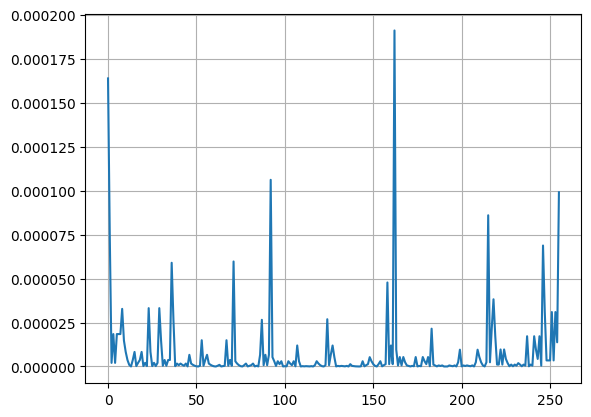

In [117]:
plt.plot(P)
plt.grid(True)

In [118]:
ii = np.where( P == np.amax(P))
print(f"El estado oculto más probable es: {HiddenStates[ii]}, es decir:")
lista = []
for i in HiddenStates[ii][0]:
    lista.append(DictH[i])
print(lista)
print(f"Y su probabilidad es de : {max(P)}")

El estado oculto más probable es: [[1 1 1 1 0 0 0 0]], es decir:
['B', 'B', 'B', 'B', 'J', 'J', 'J', 'J']
Y su probabilidad es de : 0.0001911029760000001


In [119]:
np.sum(P)

0.0019344381513984013

d).

In [120]:
ObsStates = GetStates([0, 1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [121]:
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

In [122]:
print(f"La suma de todos los estados observables es: {np.sum(PObs)}")

La suma de todos los estados observables es: 1.0000000000000007


e).

El resultado sí depende de la probabilidad a-priori ya que se útiliza para encontrar la probabilidad de los estados ocultos. 